In [1]:
import pandas as pd
import requests
import dask
import yaml

with open('config.yml') as file_handle:
    config = yaml.load(file_handle, yaml.FullLoader)

ENDPOINT_URL = config['rest_api']

Below we print the location of the endpoint we will query in this notebook:

In [2]:
print(f"REST API Endpoint: {ENDPOINT_URL}")

REST API Endpoint: https://mastapp.site/json


In [9]:
import pandas as pd
df = pd.read_json("https://mastapp.site/json/shots")
df.head()

,shot_id,timestamp,preshot_description,postshot_description,campaign,reference_shot,scenario,heating,pellets,rmp_coil,...,cpf_tvol_max,cpf_twmhd_max,cpf_useful,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zmag_efit
0,30471,2013-09-27 15:20:00,\nThe last plasma:\nConvert to i/b Helios 1724...,\nGood shot.\n,M9,30470,2.0,SS Beam,False,0.0,...,0.125,0.135,1,8.817559,9.283702,0.0,38063.582380,40906.090,0.0,0.014340
1,30470,2013-09-27 15:03:00,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,30467,2.0,SS Beam,False,NaN,...,0.135,0.105,0,9.687049,10.055509,0.0,17290.432865,22310.516,0.0,0.015164
2,30469,2013-09-27 14:39:00,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,30467,3.0,SS Beam,False,0.0,...,0.140,0.145,1,8.988730,9.047923,0.0,47466.249616,49115.805,0.0,0.015299
3,30468,2013-09-27 14:21:00,\nRepeat with new neutron camera position.\ncH...,\nGood beam.\nGood repeat.\n,M9,30467,2.0,SS Beam,False,0.0,...,0.140,0.130,1,9.102411,9.107017,0.0,48516.962675,49382.133,0.0,0.012445
4,30467,2013-09-27 14:03:00,\nRepeat with new neutron camera position.\ncH...,\nTwo times lower DD neutron rate than referen...,M9,30459,3.0,SS Beam,False,0.0,...,0.125,0.180,1,9.029202,9.046394,0.0,49469.122469,52653.445,0.0,0.013202


The shots endpoint returns a JSON payload with a list of shots. Let's look at the first element from the payload:

In [41]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

url = "https://mastapp.site/graphql"
# Select your transport with a defined url endpoint
transport = RequestsHTTPTransport(url=url)
# Create a GraphQL client using the defined transport
client = Client(transport=transport, fetch_schema_from_transport=True)

# Write a GQL query that returns only four properties
query = gql("""
query {
    all_shots  {
        shots {
            shot_id
            timestamp
            preshot_description
            divertor_config
        }
    }
}
""")

# # Query the API and get a JSON response
result = client.execute(query)
shots = result['all_shots']['shots']
df = pd.DataFrame(shots)
df.head()

KeyboardInterrupt: 

In [18]:
import requests

result = requests.get('https://mastapp.site/json/signal_datasets?per_page=2')
result.json()

[{'uuid': '2f78475e-c766-545f-9b95-4d95c634ea98',
  'name': 'ABM_CALIB_SHOT',
  'units': 'dimensionless',
  'rank': 1,
  'url': 's3://mast/ABM_CALIB_SHOT.zarr',
  'csd3_path': '/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/ABM_CALIB_SHOT.zarr.zip',
  'description': 'Shot used for calibration (obsolete)',
  'signal_type': 'Analysed',
  'quality': 'Not Checked',
  'doi': '',
  'dimensions': ['time']},
 {'uuid': '0496f46d-cc02-55c9-9cb8-b19c3ada2002',
  'name': 'ABM_CHANNEL_STATUS',
  'units': 'dimensionless',
  'rank': 2,
  'url': 's3://mast/ABM_CHANNEL_STATUS.zarr',
  'csd3_path': '/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/ABM_CHANNEL_STATUS.zarr.zip',
  'description': 'Failed = 0, OK = 1',
  'signal_type': 'Analysed',
  'quality': 'Not Checked',
  'doi': '',
  'dimensions': ['time', 'dim_0']}]

In [39]:
import requests
url="http://mastapp.site/json/shots/aggregate?data=shot_id$min,shot_id$max&groupby=campaign&sort=-campaign"
result = requests.get(url)
result.json()

[{'min_shot_id': 28390, 'max_shot_id': 30471, 'campaign': 'M9'},
 {'min_shot_id': 25404, 'max_shot_id': 28389, 'campaign': 'M8'},
 {'min_shot_id': 19027, 'max_shot_id': 25403, 'campaign': 'M7'},
 {'min_shot_id': 14707, 'max_shot_id': 19026, 'campaign': 'M6'},
 {'min_shot_id': 11695, 'max_shot_id': 14706, 'campaign': 'M5'}]

In [40]:
import json
print(json.dumps(result.json(), indent=1))

[
 {
  "min_shot_id": 28390,
  "max_shot_id": 30471,
  "campaign": "M9"
 },
 {
  "min_shot_id": 25404,
  "max_shot_id": 28389,
  "campaign": "M8"
 },
 {
  "min_shot_id": 19027,
  "max_shot_id": 25403,
  "campaign": "M7"
 },
 {
  "min_shot_id": 14707,
  "max_shot_id": 19026,
  "campaign": "M6"
 },
 {
  "min_shot_id": 11695,
  "max_shot_id": 14706,
  "campaign": "M5"
 }
]


There are 96 shots within this signal.


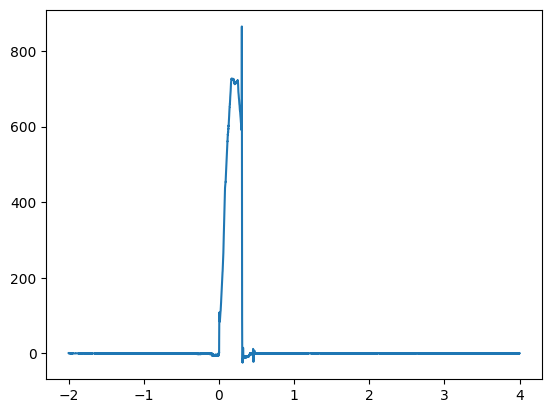

In [15]:
import s3fs
import zarr
import matplotlib.pyplot as plt

ENDPOINT_URL = 'https://s3.echo.stfc.ac.uk'
url = 's3://mast/AMC/AMC_PLASMA-CURRENT.zarr'
kwargs = {'endpoint_url': ENDPOINT_URL}

s3 = s3fs.S3FileSystem(anon=True, client_kwargs=kwargs)
store = zarr.storage.FSStore(url, fs=s3)

handle = zarr.open_consolidated(store)
groups = list(handle.groups())

print(f"There are {len(groups)} shots within this signal.")

shot = handle['30420']
plt.plot(shot['time'][:], shot['data'][:])

In [91]:
import xarray as xr
import datatree
import s3fs

ENDPOINT_URL = 'https://s3.echo.stfc.ac.uk'
url = 's3://mast/AMC/AMC_PLASMA-CURRENT.zarr'
kwargs = {'endpoint_url': ENDPOINT_URL}
storage_options = {"anon": True, "endpoint_url": ENDPOINT_URL}
backend_kwargs = {
    "storage_options": storage_options
}

s3 = s3fs.S3FileSystem(anon=True, client_kwargs=kwargs)

# Open single dataset
xr.open_dataset(s3.get_mapper(url), engine='zarr', group='30420')

xr.open_zarr(s3.get_mapper(url), group='30420')

xr.open_dataset(s3.get_mapper(url + '/30420'), engine='zarr')

xr.open_dataset(url, group='30420', backend_kwargs=backend_kwargs)

xr.open_dataset(url + '/30420', engine='zarr', backend_kwargs=backend_kwargs)

xr.open_zarr(url, group='30420', storage_options=storage_options)
# Open multiple datasets

## Using open_mfdataset
store = zarr.storage.FSStore(url, fs=s3)
groups = list(zarr.open(store).keys())
paths = [url + '/' + group for group in groups]
ds = xr.open_mfdataset(paths[:5], engine='zarr', concat_dim='shot_index', combine='nested', backend_kwargs=backend_kwargs)

## Using datatree
datatree.open_datatree(s3.get_mapper(url), engine='zarr')

/tmp/ipykernel_1440203/3506532293.py:20: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  xr.open_dataset(s3.get_mapper(url + '/30420'), engine='zarr')
/tmp/ipykernel_1440203/3506532293.py:24: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       created:      2024-03-01T15:36:23.623166
│       description:  Plasma Current
│       identifier:   29ea843c-bdc6-5311-9632-4c593275db84
│       quality:      Not Checked
│       source:       AMC
│       type:         Analysed
├── DataTree('30110')
│       Dimensions:  (time: 30000)
│       Coordinates:
│         * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
│       Data variables:
│           data     (time) float32 ...
│           error    (time) float32 ...
│       Attributes: (12/18)
│           created:       2024-03-01T15:36:26.118191
│           dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db84
│           description:   Plasma Current
│           file_name:     None
│           format:        None
│           identifier:    81ee8587-4cd8-5a32-bc9b-b1dcf7277005
│           ...            ...
│           shape:         [30000]
│           shot_id:       30110
│           source:        AMC
│           time_index:    0
│           type:          Analysed
│           units:         kA
├── DataTree('30111')
│       Dimensions:  (time: 30000)
│       Coordinates:
│         * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
│       Data variables:
│           data     (time) float32 ...
│           error    (time) float32 ...
│       Attributes: (12/18)
│           created:       2024-03-01T15:36:26.089284
│           dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db84
│           description:   Plasma Current
│           file_name:     None
│           format:        None
│           identifier:    501d548d-8129-5919-a28c-ef837584f52a
│           ...            ...
│           shape:         [30000]
│           shot_id:       30111
│           source:        AMC
│           time_index:    0
│           type:          Analysed
│           units:         kA
├── DataTree('30113')
│       Dimensions:  (time: 30000)
│       Coordinates:
│         * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
│       Data variables:
│           data     (time) float32 ...
│           error    (time) float32 ...
│       Attributes: (12/18)
│           created:       2024-03-01T15:36:26.099234
│           dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db84
│           description:   Plasma Current
│           file_name:     None
│           format:        None
│           identifier:    8cb8b9fc-2635-582d-863b-a263b3623aa4
│           ...            ...
│           shape:         [30000]
│           shot_id:       30113
│           source:        AMC
│           time_index:    0
│           type:          Analysed
│           units:         kA
├── DataTree('30116')
│       Dimensions:  (time: 30000)
│       Coordinates:
│         * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
│       Data variables:
│           data     (time) float32 ...
│           error    (time) float32 ...
│       Attributes: (12/18)
│           created:       2024-03-01T15:36:26.116399
│           dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db84
│           description:   Plasma Current
│           file_name:     None
│           format:        None
│           identifier:    b1bcecbb-e0df-5505-92a1-78678401f167
│           ...            ...
│           shape:         [30000]
│           shot_id:       30116
│           source:        AMC
│           time_index:    0
│           type:          Analysed
│           units:         kA
├── DataTree('30117')
│       Dimensions:  (time: 30000)
│       Coordinates:
│         * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
│       Data variables:
│           data     (time) float32 ...
│           error    (time) float32 ...
│       Attributes: (12/18)
│           created:       2024-03-01T15:36:42.773110
│           dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db

In [93]:
dt = datatree.open_datatree(s3.get_mapper(url), engine='zarr', drop_variables='time')